In [1]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
# import matplotlib as mpl
# mpl.use('agg')
import os
import numpy as np
import xarray as xr
from myTrend import myfitting2d_sttcs
from myPlot import  figmaster,myClrbr
from myTools import myInfo
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

varnm = 'OHC700'
t_rng=['1960-01','2022-12']

# pthrn='J:/Reanalysis/'
pthmd='J:/tmp_proc/Models/'
pthob='J:/tmp_proc/Obs/'

# wpth='C:/Users/shjo/OneDrive/mySO/TEST/'

# myttl='trend '+t_rng[0][:4]+' '+t_rng[-1][:4]

In [2]:
myMdls=[pthmd+i for i in os.listdir(pthmd) if i.endswith('.nc')]
myObsv=[pthob+i for i in os.listdir(pthob) if i.endswith('.nc')]

myDTA=myMdls+myObsv

!!! Open files !!!
!!! Open: J:/tmp_proc/Models/myGECCO_195501_201812_ztshuv.nc !!!
GECCO OHC700 trend 1960 2018
J:/tmp_proc/Models/myGECCO_195501_201812_ztshuv.nc
!!! linregress !!!
!!! figure !!!


FileNotFoundError: [Errno 2] No such file or directory: 'wpth/GECCO_OHC700_trend_1960_2018.png'

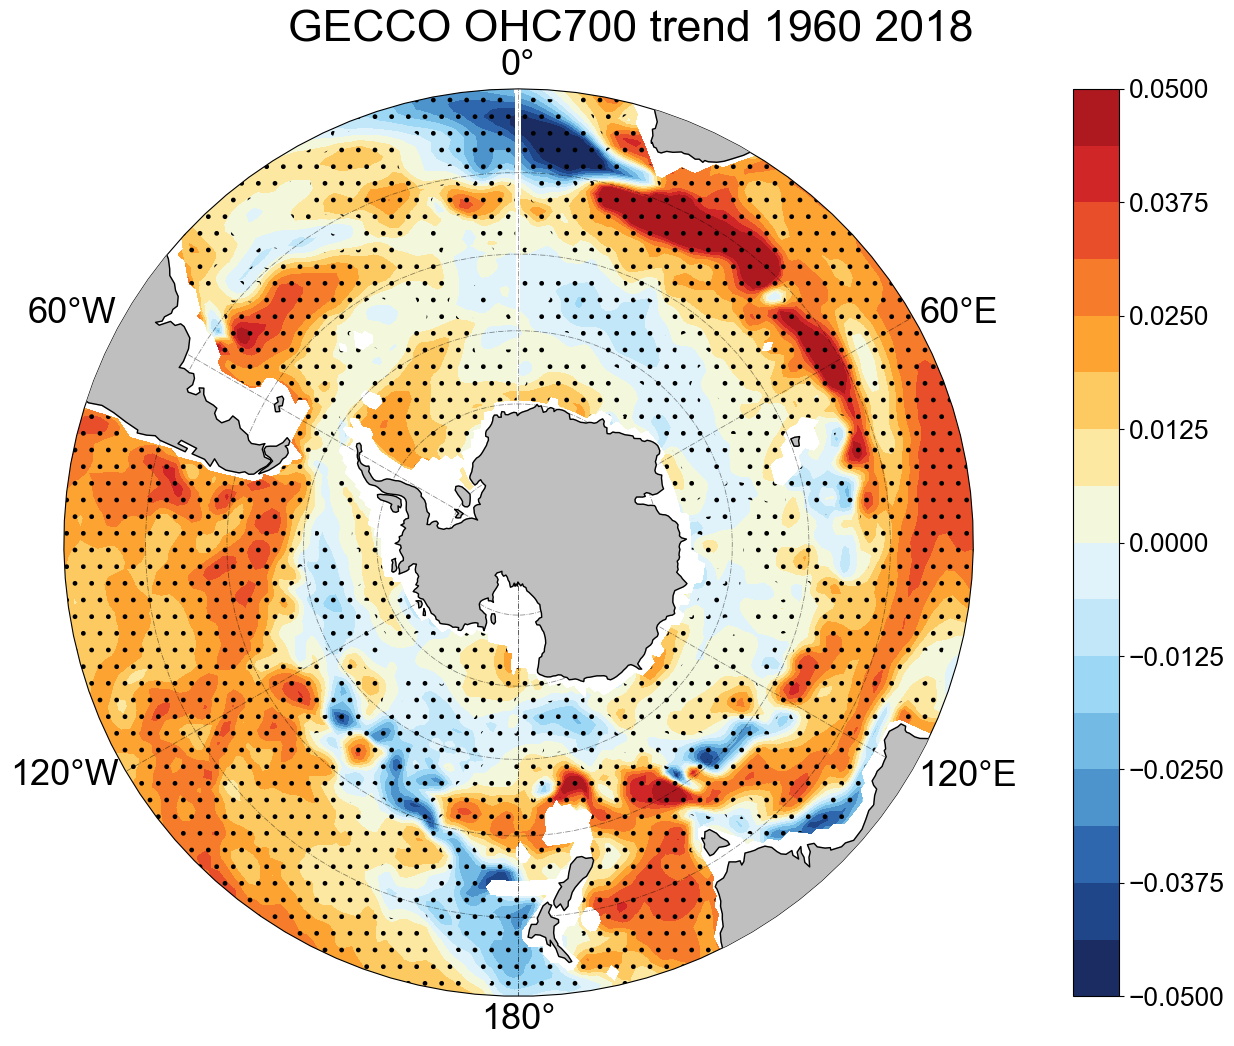

In [10]:

### Reanalysis SST trend =================================================
print('!!! Open files !!!')
lat_rng=[-80,-30] 
for i in [myDTA[1]]: 
    print('!!! Open: '+i+' !!!')
    mydata = xr.open_dataset(i)[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1])\
        ,time=slice(t_rng[0],t_rng[-1]))]
    
    mydata=mydata.where(mydata<10**20)
    lonR,latR=mydata.lon.values,mydata.lat.values
    lonR_m,latR_m=np.meshgrid(lonR,latR)

    time=mydata.time.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+' '+'trend '+\
        str(time[0])[:4]+' '+str(time[-1])[:4]

    print(dta_nm)
    print(i)
    ### SST Coef =============================================================
    print('!!! linregress !!!')
    slope,intercept,r_value,p_value,std_err,smask=myfitting2d_sttcs(mydata,threshold=0.05)
    CoefD=slope*12*10**-9 # year^-1
    
    ### Figure configs =======================================================
    myN=16
    dataTlim=[-0.05,0.05]
    CMAP,mylevel=myClrbr('myblc2',dataTlim,myN)

    CoefD[CoefD<dataTlim[0]]=dataTlim[0]
    CoefD[CoefD>dataTlim[-1]]=dataTlim[-1]

    mySetting={'title_loc':'right',
            'wpth':'wpth'}

    mySetting={
        'figsize': '',
        'mylabel': '',
        'Label_size':18,
        'title_loc':'right',
        'fontParams':'Arial',
        'wpth':'wpth'}

    ### Figure ==============================================================
    print('!!! figure !!!')
    F=figmaster(mySetting)
    F.myCrtpy_sph2(latR_m,lonR_m,CoefD,smask,CMAP,mylevel,dta_nm)
    raise

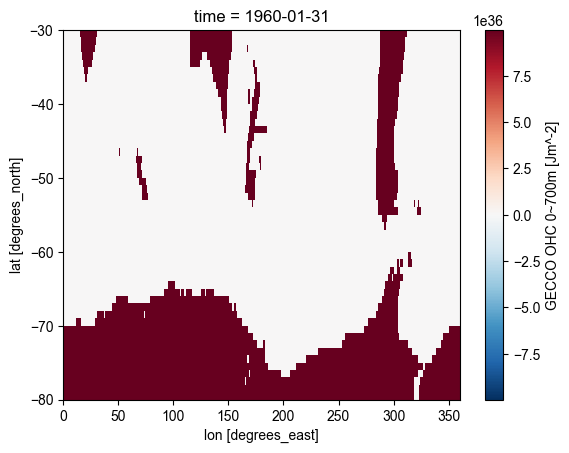

In [5]:
mydata[0].plot()


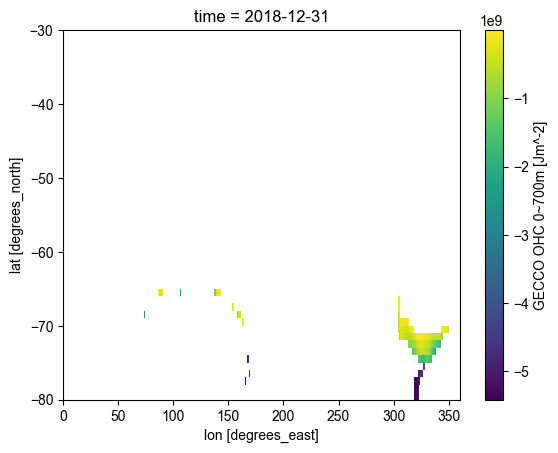

In [11]:
mydata[-1].plot()